In [ ]:
## APPLE stock price prediction
## This program is used to predict stock prices of a popular coporation(Apple Inc) in Artificial Recurrent Neural Network is called LSTM (Long Short Term Memory)

In [1]:
##Import the libraries
# Warnings
import warnings
warnings.filterwarnings('ignore')
## math library for mathematical function
import math
## labeled data view in dataframe
import pandas as pd
## data reader od panda is used fetch the data from web
# import pandas_datareader as web
## numpy is used to create multi dimensional array
import numpy as np
## tensorflow is uded to create DL model and wrapping the other libraries
import tensorflow as tf
## sklearn is providing ultility functions for standerdizing or scaling data
from sklearn.preprocessing import MinMaxScaler
## keras is a neural network library
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
## it is uded to create plotting area
import matplotlib.pyplot as mtlplt
## feature scaling distribution
from matplotlib import rcParams

In [2]:
## Get stock historical price data between 2009-01-01 and 2019-04-20 which gathered from yahoo finance page
data_frame = pd.read_csv('IBM.csv')
## Visualize the price
data_frame

,Date,Open,High,Low,Close,Adj Close,Volume
0,1987-01-02,30.250000,30.625000,30.218750,30.500000,13.188066,2740000
1,1987-01-05,30.687500,31.000000,30.656250,30.906250,13.363733,7040000
2,1987-01-06,30.968750,31.093750,30.656250,30.750000,13.296179,7840000
3,1987-01-07,30.687500,31.000000,30.531250,30.875000,13.350229,6720000
4,1987-01-08,30.812500,30.843750,30.343750,30.718750,13.282656,8960000
...,...,...,...,...,...,...,...
8749,2021-09-20,133.899994,135.179993,132.779999,134.309998,134.309998,4770700
8750,2021-09-21,135.110001,135.649994,132.940002,132.970001,132.970001,4074500
8751,2021-09-22,133.720001,135.369995,133.470001,134.630005,134.630005,3602200
8752,2021-09-23,135.250000,137.419998,135.029999,136.729996,136.729996,3013200


In [3]:
## Get the number of rows and columns in the data set
data_frame.shape

(8754, 7)

<function matplotlib.pyplot.show(*args, **kw)>

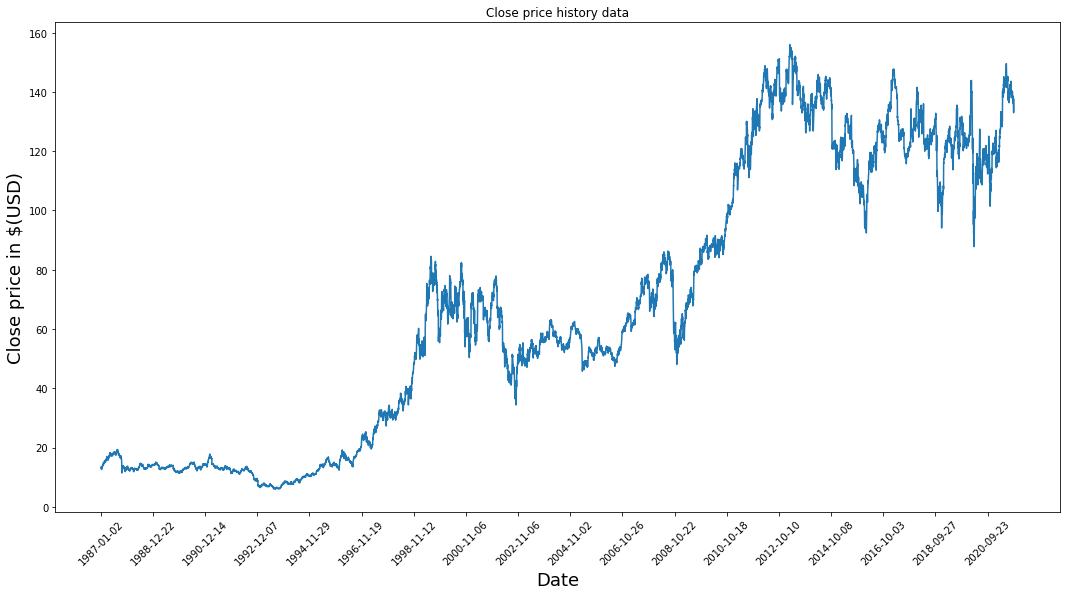

In [4]:
## Visulaizing close price on graph from historical data
mtlplt.figure(figsize=(18,9))
mtlplt.title('Close price history data')
mtlplt.plot(data_frame['Adj Close'])
#plt.plot(range(data_frame.shape[0]),(data_frame['Low']+data_frame['High'])/2.0)
mtlplt.xticks(range(0,data_frame.shape[0],500),data_frame['Date'].loc[::500],rotation=45)
mtlplt.xlabel('Date', fontsize=18)
mtlplt.ylabel('Close price in $(USD)',fontsize=18)
mtlplt.show

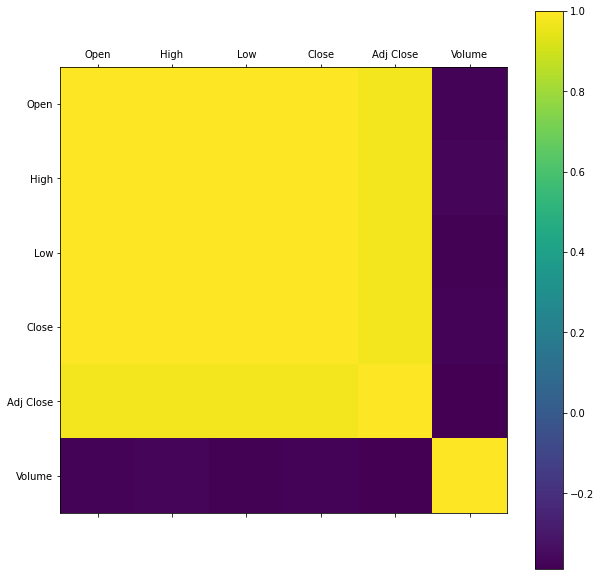

In [5]:
scaling_data_frame = data_frame.filter(['Open','High','Low','Close','Adj Close','Volume'])
## Scaling the features
scaler = MinMaxScaler(feature_range=(0,1))
## Transform the data into
scaled_Data = scaler.fit_transform(scaling_data_frame)
## Display the scaled features into dataframe
scaled_data_frame = pd.DataFrame(data=scaled_Data, index=[data_frame.Date], columns=['Open','High','Low','Close','Adj Close','Volume'] )
## Feature Scaling and visualization of feature distribution
rcParams['figure.figsize'] = 20, 10
mtlplt.matshow(data_frame.corr())
mtlplt.yticks(np.arange(scaled_data_frame.shape[1]), scaled_data_frame.columns)
mtlplt.xticks(np.arange(scaled_data_frame.shape[1]), scaled_data_frame.columns)
mtlplt.colorbar()

In [6]:
## Create a seperate dataframe with only colse column
stock_close_data = data_frame.filter(['Adj Close'])

## Convert created dataframe into numpy array
stock_close_dataset = stock_close_data.values

## Split dataset for training and testing
trainingDataLength = math.ceil( len(stock_close_dataset) * 0.8 )

## Display the training data length
trainingDataLength

7004

In [7]:
## Scaling the data its come under preprocessing stage
## Create feature range into 0,1
scaler = MinMaxScaler(feature_range=(0,1))

## Transform the data into
scaledData = scaler.fit_transform(stock_close_dataset)

## Display scaled data value
scaledData

array([[0.04851081],
       [0.04968136],
       [0.04923122],
       ...,
       [0.85773765],
       [0.87173092],
       [0.87679523]])

In [8]:
StockValiData = scaledData[trainingDataLength: , :]
Xvali = []
Yvali = []

for i in range(60, len(StockValiData)):
    Xvali.append(StockValiData[i-60:i, 0])
    Yvali.append(StockValiData[i, 0])
    if i<= 61:
        print(Xvali)
        print(Yvali)
        print()

[array([0.8748345 , 0.86463784, 0.85513778, 0.86613005, 0.80171819,
       0.77252145, 0.76535889, 0.76729898, 0.76680143, 0.7657571 ,
       0.7743617 , 0.77366532, 0.77809227, 0.77834087, 0.77814199,
       0.76963648, 0.76550835, 0.76921406, 0.77226889, 0.77938021,
       0.77842862, 0.7715176 , 0.7758746 , 0.78273575, 0.78273575,
       0.77136752, 0.76906383, 0.76510764, 0.76650992, 0.77266959,
       0.77071654, 0.77166803, 0.7727697 , 0.76961446, 0.77527379,
       0.78453832, 0.78218456, 0.77827839, 0.7712174 , 0.77687637,
       0.7644566 , 0.76726111, 0.73876573, 0.72714739, 0.71888447,
       0.72148832, 0.75028393, 0.75444053, 0.76911406, 0.77312058,
       0.77101704, 0.77362099, 0.7644566 , 0.76215286, 0.76410608,
       0.77221907, 0.75944872, 0.74222137, 0.73711339, 0.75399   ])]
[0.7574455360680754]

[array([0.8748345 , 0.86463784, 0.85513778, 0.86613005, 0.80171819,
       0.77252145, 0.76535889, 0.76729898, 0.76680143, 0.7657571 ,
       0.7743617 , 0.77366532, 0.778

In [9]:
## Create a new dataset which contain scaled value
StockTrainData = scaledData[0:trainingDataLength , :]

## Spliting the dataset into two parts such as Xtrain and Ytrain datasets
Xtrain = []
Ytrain = []

for i in range(60, len(StockTrainData)):
    Xtrain.append(StockTrainData[i-60:i, 0])
    Ytrain.append(StockTrainData[i, 0])
    if i<= 61:
        print(Xtrain)
        print(Ytrain)
        print()

[array([0.04851081, 0.04968136, 0.04923122, 0.04959138, 0.04914111,
       0.04869098, 0.04734037, 0.04454914, 0.0460798 , 0.04707026,
       0.04707026, 0.05085191, 0.04905112, 0.04905112, 0.05238251,
       0.05157219, 0.0522925 , 0.05382318, 0.05427341, 0.05328301,
       0.05337301, 0.0558941 , 0.0564344 , 0.05796503, 0.06003485,
       0.05921775, 0.05776533, 0.05749294, 0.05794685, 0.05694833,
       0.05830998, 0.06112412, 0.06085179, 0.06166878, 0.06203191,
       0.06475527, 0.06448294, 0.0635751 , 0.06185036, 0.06194117,
       0.06121481, 0.06094254, 0.06221344, 0.06257664, 0.06185036,
       0.06148718, 0.06439214, 0.0635751 , 0.06539067, 0.06584463,
       0.06566302, 0.0674786 , 0.06684318, 0.06738782, 0.06856794,
       0.06938495, 0.07165442, 0.07365162, 0.07247146, 0.07011121])]
[0.07129130025398217]

[array([0.04851081, 0.04968136, 0.04923122, 0.04959138, 0.04914111,
       0.04869098, 0.04734037, 0.04454914, 0.0460798 , 0.04707026,
       0.04707026, 0.05085191, 0.04

In [10]:
## Convert Xtrain data, Ytrain data into numpy array
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

In [11]:
Xvali = np.array(Xvali)
Yvali = np.array(Yvali)

In [12]:
## Reshape the Xtrain data (number of column and number of row)
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtrain.shape

(6944, 60, 1)

In [13]:
## Reshape the Xtrain data (number of column and number of row)
Xvali = np.reshape(Xvali, (Xvali.shape[0], Xvali.shape[1], 1))
Xvali.shape

(1690, 60, 1)

In [14]:
## Develop LSTM model
model = Sequential()

## Assign neurons as 50
neurons = 50

## First LSTM layer
model.add(LSTM(neurons, return_sequences=True, input_shape= (Xtrain.shape[1], 1))) 

## Second LSTM layer, no more layer for lstm so return_sequence is false
model.add(LSTM(neurons, return_sequences= False)) 

## Adding Dense layer which always have 25 neurons by default
model.add(Dense(25)) 
model.add(Dense(1))

In [27]:
# opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
# model.compile(
#     loss='sparse_categorical_crossentropy',
#     optimizer=opt,
#     metrics=['accuracy'],
# )

In [15]:
#Compile model (origin one)
# mse= mean squared error
model.compile(optimizer='adam', loss='mse')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [17]:
## Fiting model with given training dataset
history_data = model.fit(Xtrain, Ytrain, batch_size=50, epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
112/112 - 10s - loss: 0.0018 - val_loss: 0.0042
Epoch 2/100
112/112 - 4s - loss: 2.0900e-04 - val_loss: 0.0039
Epoch 3/100
112/112 - 4s - loss: 1.8519e-04 - val_loss: 0.0035
Epoch 4/100
112/112 - 4s - loss: 1.8052e-04 - val_loss: 0.0028
Epoch 5/100
112/112 - 4s - loss: 1.5122e-04 - val_loss: 0.0019
Epoch 6/100
112/112 - 4s - loss: 1.4592e-04 - val_loss: 0.0104
Epoch 7/100
112/112 - 4s - loss: 1.6647e-04 - val_loss: 0.0032
Epoch 8/100
112/112 - 5s - loss: 1.2259e-04 - val_loss: 0.0020
Epoch 9/100
112/112 - 4s - loss: 1.1092e-04 - val_loss: 0.0029
Epoch 10/100
112/112 - 4s - loss: 1.0317e-04 - val_loss: 0.0029
Epoch 11/100
112/112 - 4s - loss: 1.1237e-04 - val_loss: 0.0016
Epoch 12/100
112/112 - 4s - loss: 1.0323e-04 - val_loss: 0.0014
Epoch 13/100
112/112 - 4s - loss: 9.0899e-05 - val_loss: 0.0017
Epoch 14/100
112/112 - 4s - loss: 8.4963e-05 - val_loss: 0.0022
Epoch 15/100
112/112 - 4s - loss: 8.6270e-05 - val_loss: 0.0022
Epoch 16/100
112/112 - 5s - loss: 9.1677e-05 - val_l

In [30]:
# history = model.fit(Xtrain,
#                     Ytrain, 
#                     batch_size=50,
#                     epochs=4,
#                     verbose=2)

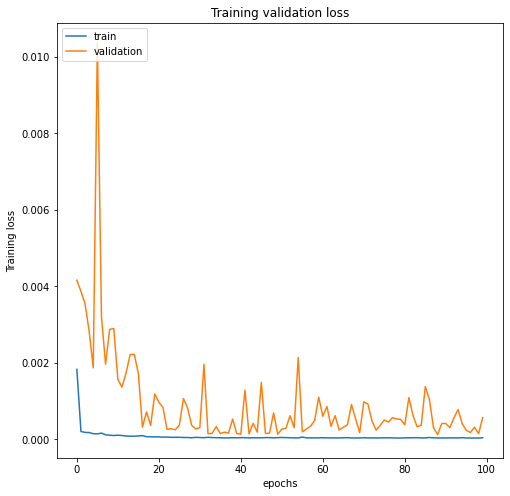

In [18]:
## Visualize train and validation loss
mtlplt.figure(figsize=(8,8))
mtlplt.title('Training validation loss')
mtlplt.plot(history_data.history['loss'])
mtlplt.plot(history_data.history['val_loss'])
mtlplt.ylabel('Training loss')
mtlplt.xlabel('epochs')
mtlplt.legend(['train' , 'validation'], loc = 'upper left')
mtlplt.show()

In [19]:
##Create testing dataset, new array which contains scaled value from 2275 out of 2843
testingData = scaledData[trainingDataLength - 60: , :]

## Create dataset Xtest and Ytest
Xtest = []
Ytest = stock_close_dataset[trainingDataLength:, :]
for i in range(60, len(testingData)):
    Xtest.append(testingData[i-60:i, 0])

In [20]:
## Convert data into numpy array
Xtest = np.array(Xtest)
Xtest

array([[0.90431954, 0.92034013, 0.91806552, ..., 0.8878659 , 0.88542891,
        0.87344173],
       [0.92034013, 0.91806552, 0.9260264 , ..., 0.88542891, 0.87344173,
        0.8748345 ],
       [0.91806552, 0.9260264 , 0.92187281, ..., 0.87344173, 0.8748345 ,
        0.86463784],
       ...,
       [0.91775123, 0.91946408, 0.92631516, ..., 0.86173569, 0.85560529,
        0.84667624],
       [0.91946408, 0.92631516, 0.92796212, ..., 0.85560529, 0.84667624,
        0.85773765],
       [0.92631516, 0.92796212, 0.88303442, ..., 0.84667624, 0.85773765,
        0.87173092]])

In [21]:
## Reshape data from 2 Dimensional to 3 Dimensional
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1 ))

In [22]:
## Get predicted stock price value
## Unscaling the predicted value
predictions = model.predict(Xtest)
predictions = scaler.inverse_transform(predictions)
predictions

array([[132.4481 ],
       [133.2522 ],
       [131.30394],
       ...,
       [128.98123],
       [131.25078],
       [133.15524]], dtype=float32)

In [23]:
## Get RSME(Root Mean Squared Error) it nearl to 5, then it will be best model
rmse=np.sqrt(np.mean(((predictions- Ytest)**2)))
rmse

3.457685762394394

In [24]:
mape = np.mean(np.abs(predictions - Ytest)/np.abs(Ytest))
mape

0.024710972386921937

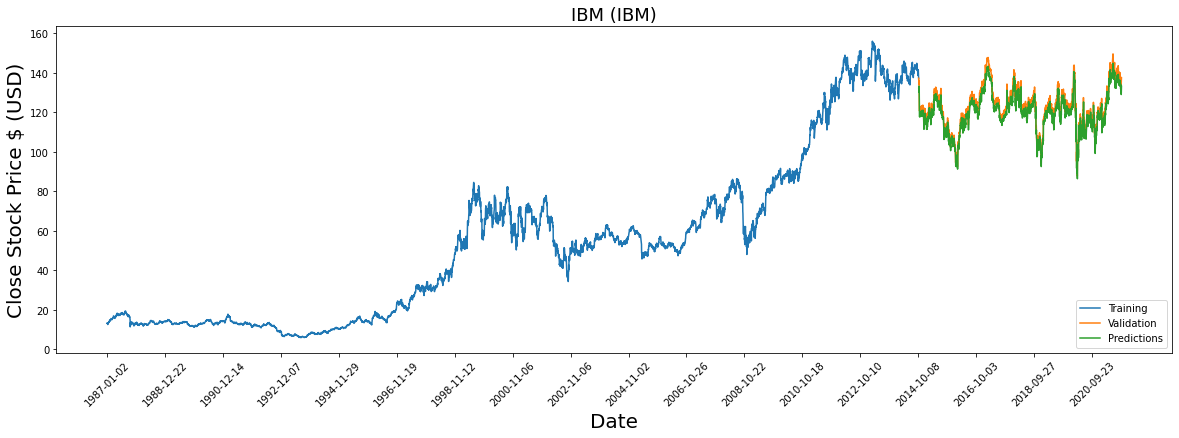

In [27]:
## Ploting data to graph train and validation
training = stock_close_data[:trainingDataLength]
validation = stock_close_data[trainingDataLength:]
validation['Predictions'] = predictions

## Visualize trainning, validating and predicting values in graph
mtlplt.figure(figsize=(20,6))
mtlplt.title('IBM (IBM)',fontsize=18)
mtlplt.xticks(range(0,data_frame.shape[0],500),data_frame['Date'].loc[::500],rotation=45)
mtlplt.xlabel('Date', fontsize=20)
mtlplt.ylabel('Close Stock Price $ (USD)', fontsize=20)
mtlplt.plot(training['Adj Close'])
mtlplt.plot(validation[['Adj Close', 'Predictions']])
mtlplt.legend(['Training', 'Validation', 'Predictions'], loc='lower right')
mtlplt.show()

In [26]:
## Show  validate and predicted stock prices
validation

,Adj Close,Predictions
7004,137.195755,132.448105
7005,135.665527,133.252197
7006,134.239838,131.303940
7007,135.889465,130.115509
7008,126.223076,132.369644
...,...,...
8749,134.309998,131.105957
8750,132.970001,130.333023
8751,134.630005,128.981232
8752,136.729996,131.250778


In [ ]:
## Get quote of apple
appleQuote = web.DataReader('AAPL', data_source='yahoo', start='2009-01-01', end='2019-04-20')

## Creating a new dataframe
new_data_frame = appleQuote.filter(['Close'])

## Get the last sixty day closing stock price values and converting the dataframe into an array
last60Days = new_data_frame[-60:].values

##Scale the data to be values between 0 and 1
last60Days_scaled = scaler.transform(last60Days)

##Creating an empty test list
X_test_data = []

##Append the past 60 days
X_test_data.append(last60Days_scaled)

##Converting the X_test_data into a numpy array
X_test_data = np.array(X_test_data)

## Reshape data from 2 Dimensionsal to 3 Dimensional
X_test_data = np.reshape(X_test_data, (X_test_data.shape[0], X_test_data.shape[1], 1))

## Get predicted scaled stock price
predicted_price = model.predict(X_test_data)

## Unscaling the predicted value
predicted_price = scaler.inverse_transform(predicted_price)

## Display the pridicted price for next day
print(predicted_price)

In [ ]:
## Get apple quote
appleQuote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-04-20', end='2020-04-20')
print(appleQuote2['Close'])